<a href="https://colab.research.google.com/github/yohanesnuwara/RandomCoolStuffs/blob/master/nonlinear_regression_confidence_interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algorithm from Christian Pedersen (NTNU), [Youtube](https://www.youtube.com/watch?v=3IgIToOV2Wk)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use("classic")

B0: 236.96897, B1: 0.00055
95% B0: (231.10931, 242.82863), 95% B1: (0.00053, 0.00057)


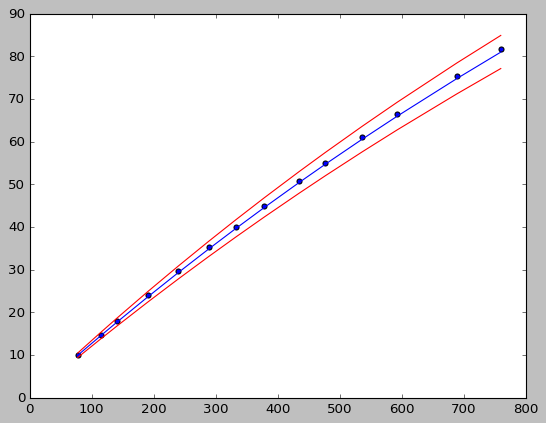

In [61]:
def f(x, B0, B1):
  return B0 * (1 - np.exp(-B1 * x))

x = np.array([77.6, 114.9, 141.1, 190.8, 239.9, 289, 332.8, 378.4, 434.8, 477.3, 
              536.8, 593.1, 689.1, 760])

y = np.array([10.07, 14.73, 17.94, 23.93, 29.61, 35.18, 40.02, 44.82, 50.76, 
              55.05, 61.01, 66.4, 75.47, 81.78])

y_hat = np.array([9.99, 14.64, 17.85, 23.81, 29.54, 35.12, 39.98, 44.91, 50.83, 
                 55.18, 61.1, 66.52, 75.39, 81.65])

B0, B1 = 236.9689711, .00055 # Result from curve_fit

n = len(y)
SSE = np.sum((y - yreg)**2)
sigma_hat = SSE / (n - 2)

df_dB0 = 1 - np.exp(-B1 * x)
df_dB1 = B0 * x * np.exp(-B1 * x)

J = np.vstack((df_dB0, df_dB1)).T
mult = np.linalg.inv(np.matmul(J.T, J))

var_B0 = mult[0,0] * sigma_hat
var_B1 = mult[1,1] * sigma_hat

std_B0, std_B1 = np.sqrt(var_B0), np.sqrt(var_B1)

CI95_B0 = (B0 - stats.t.ppf(.975, n-2) * std_B0, B0 + stats.t.ppf(.975, n-2) * std_B0)
CI95_B1 = (B1 - stats.t.ppf(.975, n-2) * std_B1, B1 + stats.t.ppf(.975, n-2) * std_B1)

print("B0: {}, B1: {}".format(np.round(B0,5), np.round(B1,5)))
print("95% B0: {}, 95% B1: {}".format(tuple(np.round(CI95_B0,5)), tuple(np.round(CI95_B1,5))))

plt.scatter(x, y)
plt.plot(x, f(x, B0, B1))
plt.plot(x, f(x, CI95_B0[0], CI95_B1[0]), color="red")
plt.plot(x, f(x, CI95_B0[1], CI95_B1[1]), color="red")
plt.show()